<a href="https://colab.research.google.com/github/takatakamanbou/ML/blob/2024/ML2024_ex11notebookB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML ex11notebookB

<img width=72 src="https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/ML-logo.png"> [この授業のウェブページ](https://www-tlab.math.ryukoku.ac.jp/wiki/?ML/2024)


----
## $K$-平均法
----


クラスタリングの手法は，**階層型クラスタリング** と **非階層型クラスタリング** に大別できます．

**階層型クラスタリング** (hierarchical clustering): 「クラスタAとクラスタBをあわせたものがクラスタPで，クラスタPとクラスタQをあわせたものがクラスタR」というように，階層的になったクラスタを作るクラスタリング手法．

**非階層型クラスタリング** (non-hierarchical clustering): クラスタ同士に上記のような階層構造をつくらないクラスタリング手法．

それぞれ，実際の手法には様々なものがあり，データや問題の性質に応じて使い分けられます．

この授業では，階層型クラスタリングについては説明しません．2年次科目「[多変量解析及び演習](https://www-tlab.math.ryukoku.ac.jp/wiki/?MVA)」で扱っていますので，興味がある人はそちらの資料等を参照してください（[MVA2023では第12回](https://www-tlab.math.ryukoku.ac.jp/wiki/?MVA/2023#ex12)）．
以下では，非階層型クラスタリングの代表例である **$K$-平均法** ($K$-means method) について説明します．



----
### 準備



以下，コードセルを上から順に実行してながら読んでいってね．

In [1]:
# 準備あれこれ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
seaborn.set()

# 実験用データの入手
df = pd.read_csv('https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/data4kmeans.csv')
dat1 = df[['x1', 'x2']].to_numpy()
dat2 = df[['y1', 'y2']].to_numpy()

---
### $K$-平均法とは

**$K$-平均法**（K-means method）は，データ同士の間のユークリッド距離が計算できるデータを対象としたクラスタリング手法です．データをいくつのクラスタに分けるかを予め決めておいて，各データをどれか一つのクラスタに割り振ります．名前の$K$は予め定めるクラスタの数を表します．


例えば，下図左のような2次元のデータに対して，クラスタ数を $K=3$ として$K$-平均法を適用すると，下図右のような結果が得られます．

<img src="https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/kmeans.png">

右の図の各データ点は，3つのクラスタのうちのどれに割り振られたかに応じて3色に塗り分けられています．
また，図中に描かれた3つの★印は，それぞれのクラスタに所属するデータの重心を表しています．
$K$-平均法では，クラスタごとのデータの重心のことを **セントロイド**(centroid)と呼びます．

---
### $K$-平均法のアルゴリズム

$N$個の$D$次元ベクトルから成るデータ集合
$$
\{ \mathbf{x}_n \in {\cal R}^{D} | n = 1, 2, \ldots, N\}
$$
を学習データとして，これを$K$個のクラスタ $C_1, C_2, \ldots, C_K$ に分ける $K$-平均法のアルゴリズムは，次のようになります．


(0) クラスタごとのセントロイド $\mathbf{c}_{k} \in {\cal R}^{D}$ ($k=1, 2, \ldots, K$)の初期値を適当に決める（具体的な方法は後述）．

(1) 学習データ $\mathbf{x}_n$ ($n = 1, 2, \ldots, N$) のそれぞれを，次の手順で $C_1, C_2, \ldots, C_K$ のいずれかに割り振る．
- $\mathbf{x}_n$ に対して，$K$個のセントロイドのうち最も距離の小さいものの番号 $y_n$ を次式のように求める（注1）．
$$
\newcommand{\argmin}{\mathop{\rm argmin}\limits}
y_n = \argmin_{k=1,2,\ldots,K}\Vert \mathbf{x}_{n} - \mathbf{c}_{k} \Vert^2
$$
- $\mathbf{x}_n$ をクラスタ $C_{y_n}$ に割り振る

(2) 各クラスタに割り振られた学習データたちの重心を求め，その値でそれぞれのセントロイドを更新する．式で書くと次の通り（注2）．
$$
\mathbf{c}_{k} = \frac{1}{|C_k|}\sum_{n:y_n = k} \mathbf{x}_n
$$

(3) 結果が一定の条件（後述）を満たしていれば終了，さもなくば (1) へ戻る．


※注1: $\rm{argmin}$ という記号の意味について： たとえば，$f(x) = (x-2)^2 + 3$ のとき，
$$
\newcommand{\argmin}{\mathop{\rm argmin}\limits}
\begin{aligned}
\min_x f(x) &= 3\\
\argmin_x f(x) &= 2\\
\end{aligned}
$$
となります．つまり，$\min$ の方は $x$ が動いたときの $f(x)$ の最小値を表すのに対して，$\rm{argmin}$ の方は $f(x)$ が最小となるときの $x$ の値を表します．
したがって，上の式の右辺は，$\Vert \mathbf{x}_{n} - \mathbf{c}_{k} \Vert^2$ ($k=1,2,\ldots,K$) が最小となる $k$ を表します．


※注2: この式の和は，$y_n$ が $k$ と等しいような $n$ たちについてとります．すなわち，クラスタ $C_k$ に所属するデータの和です．また，$|C_k|$ は集合 $C_k$ の元の数，つまり，クラスタ $C_k$ に割り振られたデータの個数です．


セントロイドの初期値は，例えば，「学習データから $K$ 個を選んでそれらをセントロイドとする」，「学習データをランダムに$K$個のクラスタに割り振って，(2)の方法でセントロイドを求める」といった方法で決めることができます．

学習の繰り返しの終了条件としては，「クラスタ割り振り結果が変わらなくなった」，「あらかじめ定めた繰り返し回数に達した」等が用いられます．

---
### $K$-平均法の性質


$K$-平均法には，次のような性質があります．

性質1: $K$-平均法の学習では，次式で表される量が最小化されます．
$$
E = \sum_{k=1}^{K}\sum_{n:y_n = k} \Vert \mathbf{x}_n - \mathbf{c}_{k}\Vert^2
$$
この値は，「学習データのそれぞれが割り振られたクラスタのセントロイドとの距離の二乗」の和となっています．アルゴリズムの繰り返しごとに，この $E$ の値は単調減少します．

性質2: $K$-平均法の結果は，初期値のとり方によって変わります．初期値によっては，$E$ の（最小でない）極小解に到達してそれ以上解が変化しなくなります．そのため，実用の際は，何通りかの初期値で学習を繰り返し，$E$の値が最も小さかった結果を採用する，といった方法がとられます．

---
### 実験: 2次元のデータに$K$-平均法を適用してみよう(1)

実際のデータに$K$-平均法を適用した際の学習の過程を観察するために，次のような2次元のデータをクラスタリングしてみましょう．

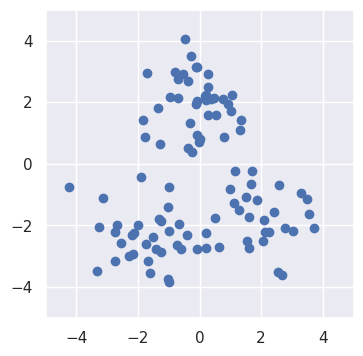

In [9]:
# データその1
X = dat1

# クラスタリング結果描画用のデータ
xmin, xmax = -5, 5
ymin, ymax = -5, 5
p = np.dstack(np.mgrid[xmin:xmax:0.05, ymin:ymax:0.05])
P = p.reshape((-1, p.shape[2]))

# 散布図
fig, ax = plt.subplots(facecolor="white", figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')
plt.show()

次のセルは，$K$-平均法のアルゴリズムを Python で実装したものです．関数を定義しているだけですので，このセルを実行しても何も出力されません．

In [3]:
## セントロイドの初期化
#
def initCentroid(X, centroid, seed=None):
    assert X.shape[1] == centroid.shape[1]
    K = centroid.shape[0]
    # 学習データからランダムに K 個を選択して初期セントロイドとする
    N = X.shape[0]
    idx = np.arange(N, dtype=int)
    if seed is not None:
        np.random.seed(seed)
    np.random.shuffle(idx)
    centroid[:] = X[idx[:K], :]

## データをクラスタに割り振る
#
def assignCluster(X, centroid, label):
    assert X.shape[1] == centroid.shape[1] and X.shape[0] == label.shape[0]
    K = centroid.shape[0]
    N = X.shape[0]
    sqe = 0.0
    for n in range(N):
        # 各セントロイドとの距離の二乗を計算
        d = np.sum((X[n, :] - centroid)**2, axis=1)
        # 距離最小のクラスタへ割り振る
        i = np.argmin(d)
        label[n] = i
        sqe += d[i]

    return sqe/N  # 割り振られたセントロイドとの距離の二乗の平均

## セントロイドを計算し直す
#
def updateCentroid(X, centroid, label):
    assert X.shape[1] == centroid.shape[1] and X.shape[0] == label.shape[0]
    K = centroid.shape[0]
    for ik in range(K):
        # ik 番目のクラスタに割り当てられたデータの平均をそのクラスタの新しいセントロイドとする
        centroid[ik, :] = np.mean(X[label==ik, :], axis=0)

次の手順で，以下の2つのセルを実行しましょう
1. 先頭に `## 初期化` と書かれたセルを実行
2. つづけて，`## 1ステップの学習を実行` と書かれたセルを実行し，表示されるグラフを観察する
3. グラフの下のセルに説明の続きがあるのでそれを読む

In [52]:
## 初期化

K = 3  # クラスタ数

N, D = X.shape
centroid = np.empty((K, D)) # セントロイド
label = np.empty(N, dtype=int) # 各学習データの所属するセントロイドの番号
labelP = np.empty(P.shape[0], dtype=int)

initCentroid(X, centroid)  # セントロイドを初期化

i = 0  # K-平均法の繰り返し回数

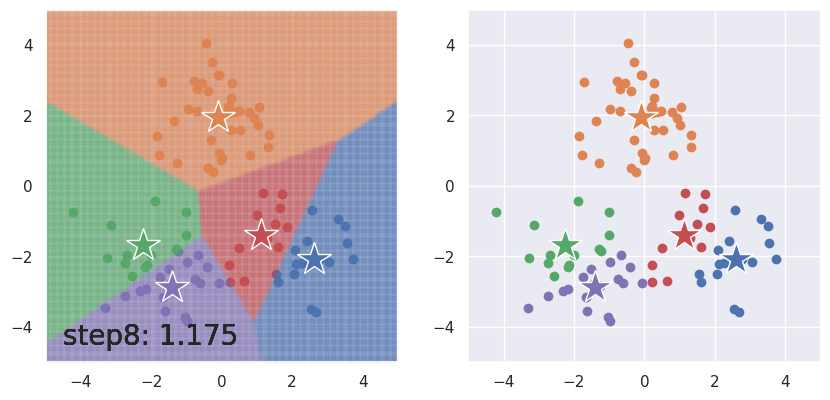

In [51]:
## 1ステップの学習を実行

# データを各クラスタに割り振る
msqe = assignCluster(X, centroid, label)
assignCluster(P, centroid, labelP)

# 現在のクラスタ割り振り結果を描画
colors = seaborn.color_palette(n_colors=K)
fig = plt.figure(facecolor="white", figsize=(10, 5))
ax0 = fig.add_subplot(121)
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.set_aspect('equal')
for ik in range(K):
    Xk = X[label==ik, :]
    Pk = P[labelP==ik, :]
    ax0.scatter(Xk[:, 0], Xk[:, 1], color=colors[ik])
    ax0.plot(centroid[ik, 0], centroid[ik, 1], color='white', marker='*', markerfacecolor=colors[ik], markersize=25)
    ax0.scatter(Pk[:, 0], Pk[:, 1], marker='.', alpha=0.1, color=colors[ik])
    ax0.text(xmin+0.5, ymin+0.5, f'step{i}: {msqe:.3f}', size=20)

# セントロイドを更新
updateCentroid(X, centroid, label)
i += 1

# 新しいセントロイドを表示
ax1 = fig.add_subplot(122)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_aspect('equal')
for ik in range(K):
    Xk = X[label==ik, :]
    ax1.scatter(Xk[:, 0], Xk[:, 1], color=colors[ik])
    ax1.plot(centroid[ik, 0], centroid[ik, 1], color='white', marker='*', markerfacecolor=colors[ik], markersize=25)

plt.show()

上記のセルを実行して表示される二つの図のうち，左のものは，現在のセントロイドを用いて学習データをクラスタに振り分けた結果を可視化したものです（アルゴリズムの(1)の結果に相当）．★印の点がセントロイドです．
学習データの各点は，割り振られたクラスタに応じて，セントロイドと同じ色に塗られています．
平面上の各点も同様に塗り分けられています．
また，左下の `stepX: Y` の部分は，学習の繰り返し回数が X で，その時点での「所属クラスタとの距離の2乗の平均」の値が Y であることを示しています．

一方，右は，左の結果を用いて，各クラスタのセントロイドを計算し直した結果を示しています（アルゴリズムの(2)の結果に相当）．★印で示されたセントロイドが，それぞれの色に塗られた学習データの重心に移動しています．

図の見方が分かったら，`## 1ステップの学習を実行` のセルのみを何度か実行して，次のことを観察しましょう．
- 学習の繰り返しによってクラスタの割り振りやセントロイドの位置はどのように変化する？
- 「所属クラスタとの距離の2乗の平均」の値はどのように変化する？

初期値にもよりますが，およそ十数回の繰り返しで変化がなくなるはずです．

#### ★★ やってみよう ★★

1. $K$-平均法の結果は，初期値（学習開始時のセントロイドの値）によって変わります．`## 初期化` を実行するたびに初期値が変わりますので，それを実行してから `## 1ステップの学習を実行` を繰り返し実行して，異なる初期値では結果がどのように違ってくるか観察してみましょう．
1. `## 初期化` のセルの `K = 3  # クラスタ数` のところをいじれば，$K=3$ 以外の条件でも実験できます．いろいろ試してみましょう．

---
### 実験: 2次元のデータに$K$-平均法を適用してみよう(2)

別の2次元データでもやってみましょう．

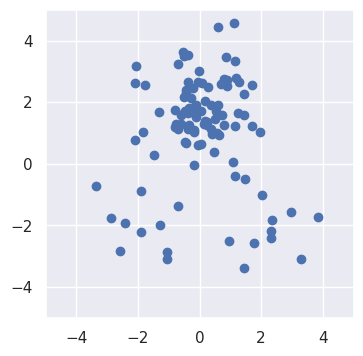

In [12]:
# データその2
Y = dat2

# クラスタリング結果描画用のデータ
xmin, xmax = -5, 5
ymin, ymax = -5, 5
p = np.dstack(np.mgrid[xmin:xmax:0.05, ymin:ymax:0.05])
P = p.reshape((-1, p.shape[2]))

# 散布図
fig, ax = plt.subplots(facecolor="white", figsize=(4, 4))
ax.scatter(Y[:, 0], Y[:, 1])
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')
plt.show()

In [30]:
## 初期化

K = 3  # クラスタ数

N, D = Y.shape
centroid = np.empty((K, D)) # セントロイド
label = np.empty(N, dtype=int) # 各学習データの所属するセントロイドの番号
labelP = np.empty(P.shape[0], dtype=int)

# セントロイドを初期化
initCentroid(Y, centroid, seed=1)

i = 0  # K-平均法の繰り返し回数

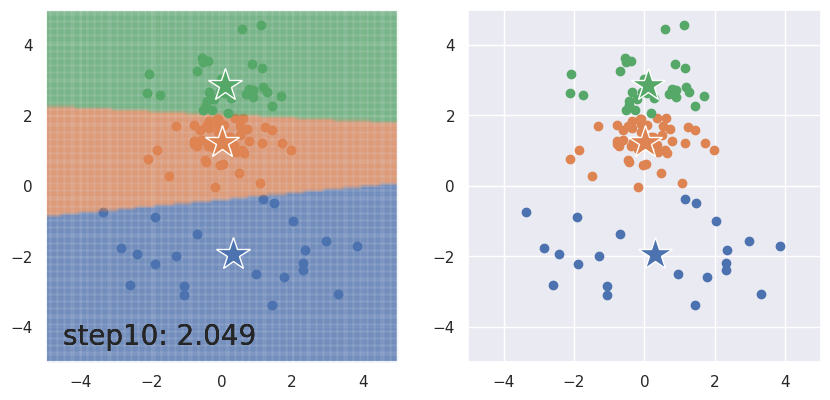

In [41]:
## 1ステップの学習を実行

# データを各クラスタに割り振る
msqe = assignCluster(Y, centroid, label)
assignCluster(P, centroid, labelP)

# 現在のクラスタ割り振り結果を描画
colors = seaborn.color_palette(n_colors=K)
fig = plt.figure(facecolor="white", figsize=(10, 5))
ax0 = fig.add_subplot(121)
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.set_aspect('equal')
for ik in range(K):
    Xk = Y[label==ik, :]
    Pk = P[labelP==ik, :]
    ax0.scatter(Xk[:, 0], Xk[:, 1], color=colors[ik])
    ax0.plot(centroid[ik, 0], centroid[ik, 1], color='white', marker='*', markerfacecolor=colors[ik], markersize=25)
    ax0.scatter(Pk[:, 0], Pk[:, 1], marker='.', alpha=0.1, color=colors[ik])
    ax0.text(xmin+0.5, ymin+0.5, f'step{i}: {msqe:.3f}', size=20)

# セントロイドを更新
updateCentroid(Y, centroid, label)
i += 1

# 新しいセントロイドを表示
ax1 = fig.add_subplot(122)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_aspect('equal')
for ik in range(K):
    Xk = Y[label==ik, :]
    ax1.scatter(Xk[:, 0], Xk[:, 1], color=colors[ik])
    ax1.plot(centroid[ik, 0], centroid[ik, 1], color='white', marker='*', markerfacecolor=colors[ik], markersize=25)

plt.show()

この実験では，初期値の違いによる結果の違いを確認しやすくするために，初期値を決めるための乱数の種を固定して，何度実行しても同じ結果が得られるようにしてあります．
次のことをやってみましょう．

#### ★★ やってみよう ★★

1. まずはそのまま実行して結果を観察しましょう．
1. 次に，`## 初期化` のセルの中で
```
# セントロイドを初期化
initCentroid(Y, centroid, seed=1)
```
と書かれた行の，`seed=1` のところを，`seed=0` や `seed=2` に変えてやり直してみましょう．違う初期値で学習させることができます．クラスタリング結果や「所属クラスタとの距離の2乗の平均」の値はどうなるでしょうか．

---
### その他の非階層的クラスタリングアルゴリズム

非階層的なクラスタリングのアルゴリズムは，$K$-平均法の他にもたくさんありますが，この授業では説明を省略します．興味のあるひとは，機械学習やデータ分析・データマイニングの教科書などを読んでみてください．

以下のリンク先には，Pythonの機械学習ライブラリ scikit-learn で実装されている各種クラスタリングアルゴリズムの紹介があります．
https://scikit-learn.org/stable/modules/clustering.html